In [29]:
from sklearn import datasets
import matplotlib.pyplot as plt        
from sklearn.decomposition import PCA


In [30]:
oliv = datasets.fetch_olivetti_faces()       

In [31]:
oliv.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [32]:
oliv['data'].shape

(400, 4096)

In [33]:
oliv['images'].shape              

(400, 64, 64)

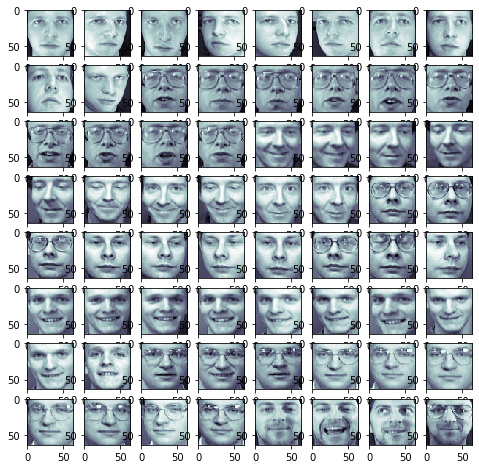

In [34]:
fig = plt.figure(figsize = (8,8))    
for i in range(64):                  
    ax = fig.add_subplot(8, 8, i + 1)               
    ax.imshow(oliv.images[i], cmap = plt.cm.bone)  
plt.show()    

##### So, what the dataset is actually about is first 10 images of 1 person and the next 10 of another person. so, the whole dataset is 400 images of 40 different people

# Now applying PCA. when plotting we needed oliv.images but with PCA we actually need oliv.data and oliv.target

In [35]:
X = oliv.data
Y = oliv.target

In [36]:
pca = PCA()
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [37]:
len(pca.components_)

400

#### if we had a (2000 * 13) data, then we'll have 13 components because without passing the number of features PCA will keep the same number of features i.e. 13. Within those 13 components each component is basically a unit vector in the original 13 dimensional space.


#### let's say i had a 2D data and if i apply PCA it'll find two components for me unless n_components is given and each component can be described by a unit vector in the ORIGINAL SPACE THAT WE HAD i.e. 2D SPACE


#### so for (2000 * 13), we'll get 13 components adn each componetn can be described in a 13 dimensional space by 13 sized unit vector because no. of dimensions = size of unit vector


#### No we have (400 * 4096). so from our logic we had 4096 features. so we should have 4096 components and each component should be of length 4096 but that's not how things work. if we look at the no. of components that we have, it'll actually be 400. the default value of n_components is minimum of the two i.e. minimum of the (400 * 4096) i.e. 400.
#### So, the shape of pce.components_ will be 400 components * 4096 length i.e. 4096 dimensional space i.e. each component of the 400 components will be defined in the 4096 dimensional space because that's the length of each eigen vector in the original space that we had

In [10]:
pca.components_.shape

(400, 4096)

#### FIGURING OUT HOW MANY COMPONENTS WE WANT TO KEEP

In [11]:
k = 0
total = sum(pca.explained_variance_)
currentSum = 0
while currentSum/total < 0.95:
    currentSum += pca.explained_variance_[k]
    k = k + 1
k

123

In [12]:
pca = PCA(n_components = k)
transformed_data = pca.fit_transform(X)
transformed_data.shape

(400, 123)

# so now we hace 400 images but the no. of dimensions we now have is 123 from the earlier 4096. we had 400 components but they were getting represented by 4096 dimensions and on applying PCA we actually made the dimensions of the PCA from 4096 to 123

#### when you're using PCA in pca = PCA(n_components = k) try to use one parameter as whiten = true and see if it is leading to better results. it's kind of similar to feature scaling like feature scaling applied ONCE you've done PCA. like we have these 123 components from the earlier 4096 and if whiten = true then what's going to happen is that these 123 new features that you have, they will be reduced to 0 MEAN and UNIT VARIANCE like they will have same variance among all these 123 features. it sometimes helps a lot

#### we can't really judge it in this case but if we're applying SVM or a classification algorithm then we can use it to see if it is actually leading to better results or not

In [13]:
pca = PCA(n_components = k, whiten = True)
transformed_data = pca.fit_transform(X)
transformed_data.shape

(400, 123)

In [14]:
X_approx = pca.inverse_transform(transformed_data)
X_approx.shape

(400, 4096)

In [15]:
X_approx_images = X_approx.reshape((400, 64, 64))  

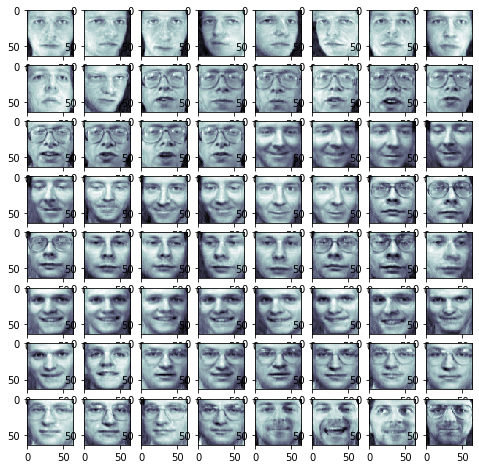

In [16]:
fig = plt.figure(figsize = (8,8))
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1)
    ax.imshow(X_approx_images[i], cmap = plt.cm.bone)       
plt.show()    

# fitting the algorithm on logistic regression model and comparing the speeds without applying PCA and with applying PCA. when we are using with applying PCA then we are also using with whiten = True and without using whiten as a parameter

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(oliv['data'], oliv['target'], random_state = 0)

In [27]:
# WITHOUT APPLYING PCA

from sklearn import decomposition, linear_model, datasets
import time
clf = linear_model.LogisticRegression()
start = time.time()
clf.fit(X_train,Y_train)
ending = time.time()
print(ending - start)
clf.score(X_test,Y_test)

C:\Users\omkes\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\omkes\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


11.550214767456055


0.98

In [19]:
# WITH APPLYING PCA AND WITH WHITEN = TRUE

clf1 = linear_model.LogisticRegression()
pca = PCA(n_components = k, whiten = True)
transformed_data = pca.fit_transform(X_train)
X_train1 = transformed_data
Y_train1 = Y_train
X_test1 = pca.transform(X_test)
start = time.time()
clf1.fit(X_train1, Y_train1)
ending = time.time()
print(ending - start)
clf1.score(X_test1, Y_test)

C:\Users\omkes\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\omkes\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.19750189781188965


0.94

#### as we can see with applying PCA the time to give the score become considerably less then when we used without applying PCA and the score actually increased without whiten as a parameter. now the case of whiten may differ from case to case i.e. in some cases whiten = True might actually lead to better results and vice-versa but applying PCA reduced the accuracy a little bit but increased the time by a lot

In [21]:
eigenv = pca.components_
eigenv.shape

(123, 4096)